# Reinforcement Learning

## GridWorlds

This assignment involves finding optimal policies for two grid worlds (CliffWalking and WindyGridWorld) using SARSA and Q learning. Details about WindyGridWorld (Example 6.5) and CliffWalking (Example 6.6) can be found in the following link.
    
    http://incompleteideas.net/book/RLbook2020.pdf


You need gym (version 0.18) and numpy (version 1.20.1) for this assignment. The environment for both problems are provided. 

For Windy Grid World environemnt you also need the file 'WindyGridWorld.py'. 

### Task 1: Learning [5 Marks]

You only need to write the codes for SARSA and Q-learning algorithms. Then do the learning in both 'CliffWalking' and 'Windy Grid World' environments. 

### Task 2: Analysis [5 Marks]   

1. Calculate the average return across the episodes. It gives you a measure of the performance of the algorithm while learning.  

2. Calculate the return after convergence. It gives you a measure of the performance after the learning is completed. 

3. What do you observe from these results?

Install the necessary packages

In [1]:
!pip install gym==0.18
!pip install numpy==1.20.1
!pip install tqdm 

# Task 1: Learning
## Task 1a: Learning in CliffWalking Environment

### Environment for CliffWalking

The board is a 4x12 matrix, with (using NumPy matrix indexing):
    [3, 0] as the start at bottom-left
    [3, 11] as the goal at bottom-right
    [3, 1..10] as the cliff at bottom-center

Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward
and a reset to the start. If an action would take you off the grid, you remain in the previous state.
An episode terminates when the agent reaches the goal.


In [2]:

import gym
import numpy as np
from tqdm import tqdm 

env = gym.make('CliffWalking-v0') # Create the environment #render_mode="human"  human, ansi, 
env.reset() # reset environment to a new, random state
env.render() # Renders the environment for visualization

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



Here _x_ is the location of the agent, *o* are possible places to go to, *C* is the cliff, and *T* is the target.

In [3]:
num_actions = env.action_space.n 
num_states = env.observation_space.n 

print("Number of actions: ", num_actions)
print("Number of states: ", num_states)

Number of actions:  4
Number of states:  48


In [4]:
action = 0 # Move up
a = env.step(action) # This is the function we use to interact with the environment
env.render() # Renders the environment for visualization

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T



In [5]:
# 0 -> UP, 1 -> RIGHT, 2 -> DOWN, 3 -> LEFT
env.reset()
import time
for action in [0, 1, 2, 3]:
    print("Action: ", action)
    time.sleep(1)
    next_state, reward, is_done, info = env.step(action)     # next_state, reward, is_done, info
    print("Next state: ", next_state)
    print("Reward: ", reward)
    print("Done: ",is_done)
    env.render()
env.reset()

Action:  0
Next state:  24
Reward:  -1
Done:  False
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

Action:  1
Next state:  25
Reward:  -1
Done:  False
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

Action:  2
Next state:  36
Reward:  -100
Done:  False
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

Action:  3
Next state:  36
Reward:  -1
Done:  False
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



36

As you can see above, each non-terminal action has a reward of -1. 0 -> UP, 1 -> RIGHT, 2 -> DOWN, 3 -> LEFT. The moment the agent falls off the cliff the reward becomes -100 and the agent resets to the start.

In [6]:
# Initialize values 
num_episodes = 1000
lr = 0.8 #alpha, lr = a/n can satisfy Robbins-Monro convergence
epsilon = 0.25

In [7]:
# Initialize Q function - a simplified version is used here 
# in reality the number of states may be unknown and all states may not be reachable 

Q = {i:[0]*num_actions for i in range(num_states)}

In [8]:
def behavioral_policy(state, Q, num_actions, epsilon):
    # Implement the epsilon-greedy policy
    # Don't forget the epsilon-greedy idea
    probs = [epsilon/num_actions]*num_actions
    best_action = np.argmax(Q[state])
    probs[best_action] += 1-epsilon
    
    action = np.argmax(np.random.multinomial(1, probs, size=1)[0])
    return action

In [9]:
# You can use this to check if your algorithm is correct
for i in range(10):
    print(behavioral_policy(0, Q, num_actions, 0.8))

3
3
0
0
3
0
2
2
1
2


### Helper Functions

1. Visualize Policy as annotations ('↑', '↓', '←', '→')

In [10]:
def visualizePolicy(p):
    for i in range(0,4):
        for j in range(12):
            #↑↓← →
            case = p[i*12+j]
            if case == 0 : print("↑", end=' ')
            if case == 1 : print("→", end=' ')
            if case == 2 : print("↓", end=' ')
            if case == 3 : print("←", end=' ')
        print()

2. Visualize the learning results

In [11]:
# run this cell if you do not have the matplotlib library
# !pip install matplotlib
import matplotlib.pyplot as plt

In [12]:
def plot_rate(episode_length_A, episode_length_B, total_reward_episode_A, total_reward_episode_B, title, mode=1):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    ax[0].plot(episode_length_A, label='SARSA')
    ax[0].plot(episode_length_B, label='Q-Learning', color='orange')
    ax[0].set_ylim([0, 2000])
    ax[0].set_title("Episode Length over time")
    ax[0].set(xlabel="Episode", ylabel="Length")
    ax[0].legend()
    
    ax[1].plot(total_reward_episode_A, label='SARSA')
    ax[1].plot(total_reward_episode_B, label='Q-Learning', color='orange')
    if mode == 1:
        ax[1].set_ylim([-10000,0])
    if mode == 2:
        ax[1].set_ylim([-500,0])
    if mode == 3:
        ax[1].set_ylim([-1000,0])
    ax[1].set_title("Episode reward over time")
    ax[1].set(xlabel="Episode reward over time", ylabel="Reward")
    ax[1].legend()
    
    fig.suptitle(title)
    plt.show()

### SARSA Learning 

In [13]:
import copy

def sarsa(env, Q, num_actions, num_episodes, epsilon, lr):
    
    episode_length = [0] * num_episodes
    total_reward_episode = [0] * num_episodes
    
    # epsilon-decrease strategy
    gap = (epsilon-0.05)/(num_episodes+1)
    
    # init Q
    Q = copy.deepcopy(Q)
    
    for episode in tqdm(range(num_episodes)):
        state = env.reset()
        is_done = False
        
        # implement SARSA
        action = behavioral_policy(state, Q, num_actions, epsilon)
        
        # lri, actual learning rate in each move
        count = 1
        lri = lr
        
        # epsilon-decrease strategy
        epsilon -= gap
        
        while not is_done:
            
            next_state, reward, is_done, info = env.step(action)
            next_action = behavioral_policy(next_state, Q, num_actions, epsilon)
            
            Q[state][action] = Q[state][action] + lri*(reward + Q[next_state][next_action]-Q[state][action])
            state = next_state
            action = next_action
            
            # update lri
            count += 1
            lri = lr * (1/count)
            
            episode_length[episode] += 1
            total_reward_episode[episode] += reward
    
    policy = {}
    
    for i in range(num_states):
        policy[i]=np.argmax(Q[i])

    return Q, policy, {"rewards": total_reward_episode, "length": episode_length}

In [14]:
# Run SARSA
optimal_sarsa_Q, sarsa_optimal_policy, sarsa_info = sarsa(env, Q, num_actions, num_episodes, epsilon, lr)

100%|██████████| 1000/1000 [00:15<00:00, 65.14it/s] 


### Q-Learning

In [15]:
import copy

def q_learning(env, Q, num_actions, num_episodes, epsilon, lr):
    # Given to students
    episode_length = [0] * num_episodes
    total_reward_episode = [0] * num_episodes
    
    # epsilon-decrease strategy
    gap = (epsilon-0.05)/(num_episodes+1)
    
    # init Q
    Q = copy.deepcopy(Q)
   
    for episode in tqdm(range(num_episodes)):
        state = env.reset()
        is_done = False
        
        # epsilon-decrease strategy
        epsilon -= gap
        
        # lri, actual learning rate in each move
        count = 1
        lri = lr
        
        # Implemnt Q-Learning
        while not is_done:
            
            action = behavioral_policy(state, Q, num_actions, epsilon)
            
            next_state, reward, is_done, info = env.step(action)
            next_action = np.argmax(Q[next_state])
            
            Q[state][action] = Q[state][action] + lri*(reward + Q[next_state][next_action]-Q[state][action])
            state = next_state
            
            # update lri
            count += 1
            lri = lr * (1/count)
            
            total_reward_episode[episode] += reward
            episode_length[episode] += 1
            
    policy = {}
    # Write the code here
    
    for i in range(num_states):
        policy[i]=np.argmax(Q[i])

    return Q, policy, {"rewards": total_reward_episode, "length": episode_length}

In [16]:
# Run Q-Learning 
optimal_Q, q_optimal_policy, q_info = q_learning(env, Q, num_actions, num_episodes, epsilon, lr)

100%|██████████| 1000/1000 [00:20<00:00, 48.98it/s]


### Results

1. optimal policy

In [17]:
print("\nGridWorld SARSA Optimal policy: \n")
visualizePolicy(sarsa_optimal_policy)
print("\n", sarsa_optimal_policy)


GridWorld SARSA Optimal policy: 

→ → → → → → → → → ↓ → ↓ 
→ → → → → → → → → → → ↓ 
↑ ↑ ↑ → ↑ ↑ ↑ ↑ ↑ ← → ↓ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 

 {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 2, 10: 1, 11: 2, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 2, 24: 0, 25: 0, 26: 0, 27: 1, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 3, 34: 1, 35: 2, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0}


In [18]:
print("\nGridWorld Q-Learning Optimal policy: \n")
visualizePolicy(q_optimal_policy)
print("\n", q_optimal_policy)


GridWorld Q-Learning Optimal policy: 

→ → → ↑ ↑ → ↑ → ← ↑ ↑ ↑ 
↑ → → → ↓ → → → → → ↓ ↓ 
→ → → → → → → → → → → ↓ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 

 {0: 1, 1: 1, 2: 1, 3: 0, 4: 0, 5: 1, 6: 0, 7: 1, 8: 3, 9: 0, 10: 0, 11: 0, 12: 0, 13: 1, 14: 1, 15: 1, 16: 2, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 2, 23: 2, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 2, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0}


2. average return across the episodes

In [19]:
# Calculate the average return across the episodes for each environment
av_sarsa_len_gw = sum(sarsa_info['length']) / num_episodes
print("\nAverage return across the episodes of SARSA:",av_sarsa_len_gw)


Average return across the episodes of SARSA: 53.095


In [20]:
# Calculate the average return across the episodes for each environment
av_q_len_gw = sum(q_info['length']) / num_episodes
print("\nAverage return across the episodes of Q-Learning:",av_q_len_gw)


Average return across the episodes of Q-Learning: 73.048


3. average return after convergence

In [21]:
def smoothData(arr, window_size=20):
    if len(arr) == 1000:
        sample_arr = arr[::2]
    l = len(sample_arr)
    size = window_size//2
    avg_arr = []
    for i in range(l): 
        left = max(0, i-size)
        right = min(i+size, l)
        val = sum(sample_arr[left:right])/(right-left)
        avg_arr.append(val)
    return avg_arr

In [22]:
import math

def getConvergence(arr, goal=-90, threshold=20):
    for i in range(len(arr)):
        if abs(arr[i] - goal) <= threshold:
            return i
    raise ValueError("The array is not converging")

In [23]:
sarsa_info_rewards = smoothData(sarsa_info["rewards"])
sarsa_info_l = len(sarsa_info_rewards)
sarsa_con_index = getConvergence(sarsa_info_rewards)
sarsa_con_av_len = sum(sarsa_info["length"][sarsa_con_index:]) / (sarsa_info_l-sarsa_con_index)
print("\nConvergence point of SARSA:",sarsa_con_index)
print("\nAverage return after convergence of SARSA:",sarsa_con_av_len)


Convergence point of SARSA: 78

Average return after convergence of SARSA: 70.03791469194313


In [24]:
q_info_rewards = smoothData(q_info["rewards"])
q_info_l = len(q_info_rewards)
q_con_index = getConvergence(q_info_rewards)
q_con_av_len = sum(q_info["length"][q_con_index:]) / (q_info_l-q_con_index)
print("\nConvergence point of Q-Learning:",q_con_index)
print("\nAverage return after convergence of Q-Learning:",q_con_av_len)


Convergence point of Q-Learning: 111

Average return after convergence of Q-Learning: 66.293059125964


4. rewards and length

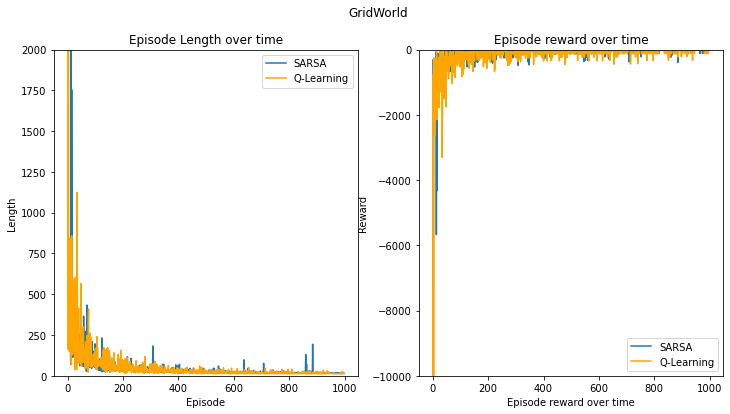

In [25]:
plot_rate(sarsa_info["length"], q_info["length"], sarsa_info["rewards"], q_info["rewards"], "GridWorld")

In [26]:
run_times = 10

for i in range(run_times):
    
    # Run SARSA
    _, _, sarsa_info_tmp = sarsa(env, Q, num_actions, num_episodes, epsilon, lr)
    sarsa_info["length"] = [ sarsa_info["length"][i] + sarsa_info_tmp["length"][i] for i in range(num_episodes)]
    sarsa_info["rewards"] = [ sarsa_info["rewards"][i] + sarsa_info_tmp["rewards"][i] for i in range(num_episodes)]
    
    # Run Q-Learning 
    _, _, q_info_tmp = q_learning(env, Q, num_actions, num_episodes, epsilon, lr)
    q_info["length"] = [ q_info["length"][i] + q_info_tmp["length"][i] for i in range(num_episodes)]
    q_info["rewards"] = [ q_info["rewards"][i] + q_info_tmp["rewards"][i] for i in range(num_episodes)]

sarsa_info["length"] = [val/(run_times+1) for val in sarsa_info["length"]]
sarsa_info["rewards"] = [val/(run_times+1) for val in sarsa_info["rewards"]]
q_info["length"] = [val/(run_times+1) for val in q_info["length"]]
q_info["rewards"] = [val/(run_times+1) for val in q_info["rewards"]]

100%|██████████| 1000/1000 [00:53<00:00, 18.61it/s]


In [27]:
gw_sarsa_info_length = smoothData(sarsa_info["length"], 50)
gw_q_info_length = smoothData(q_info["length"], 50)
gw_sarsa_info_rewards = smoothData(sarsa_info["rewards"], 50)
gw_q_info_rewards = smoothData(q_info["rewards"], 50)

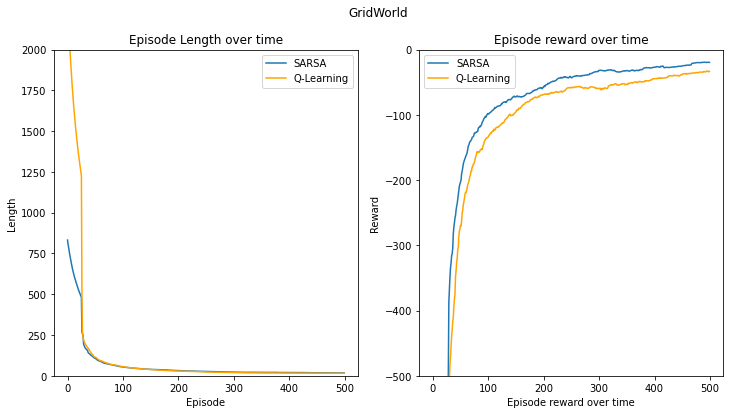

In [28]:
plot_rate(gw_sarsa_info_length, gw_q_info_length, gw_sarsa_info_rewards, gw_q_info_rewards, "GridWorld", 2)

## Task 1b: Learning in Windy Grid world

WindyGridWorld is similar to GridWorld, but with a few differences. You only need to move to the target state. But this time there is a cross-wind across the center of the grid that will push you upwards. In columns 3, 4, 5, and 8 there are winds of strength 1 while in column 6 and 7 there are winds of strength 2. For more details refer Example 6.5 in

 http://incompleteideas.net/book/RLbook2020.pdf

 You only need to change the environment and reuse the SARSA and Q-learning algorithms. 

In [29]:
#Windy Grid World environment
from WindyGridWorld import WindyGridWorld
env = WindyGridWorld()
env.reset()
env.render()

o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o



In [30]:
num_actions = env.action_space.n 
num_states = env.observation_space.n 

print("Number of actions: ", num_actions)
print("Number of states: ", num_states)

Number of actions:  4
Number of states:  70


Play around with different learning rates epsilons, and Q initializations to see what is best.

In [31]:
num_episodes = 1000
lr = 0.8 #alpha, lr = a/n can satisfy Robbins-Monro convergence
epsilon = 0.25
Q = {i:[0]*num_actions for i in range(num_states)}

In [32]:
optimal_sarsa_Q, sarsa_optimal_policy, sarsa_info = sarsa(env, Q, num_actions, num_episodes, epsilon, lr)

100%|██████████| 1000/1000 [00:49<00:00, 20.34it/s]


In [33]:
optimal_Q, q_optimal_policy, q_info = q_learning(env, Q, num_actions, num_episodes, epsilon, lr)

100%|██████████| 1000/1000 [00:43<00:00, 22.79it/s] 


### Results

1. optimal policy

In [34]:
print("\nGridWorld SARSA Optimal policy: \n")
visualizePolicy(sarsa_optimal_policy)
print("\n", sarsa_optimal_policy)


GridWorld SARSA Optimal policy: 

← → → ↑ → → → → → ↓ ↓ ↓ 
↑ ↓ → → → ↓ → ↓ ↑ ↑ ↓ ↓ 
↓ → → → ↓ ↓ → ↓ ↑ → ↓ → 
→ ↑ ← ↓ ↓ → → ↑ → → ↑ ← 

 {0: 3, 1: 1, 2: 1, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 2, 10: 2, 11: 2, 12: 0, 13: 2, 14: 1, 15: 1, 16: 1, 17: 2, 18: 1, 19: 2, 20: 0, 21: 0, 22: 2, 23: 2, 24: 2, 25: 1, 26: 1, 27: 1, 28: 2, 29: 2, 30: 1, 31: 2, 32: 0, 33: 1, 34: 2, 35: 1, 36: 1, 37: 0, 38: 3, 39: 2, 40: 2, 41: 1, 42: 1, 43: 0, 44: 1, 45: 1, 46: 0, 47: 3, 48: 3, 49: 3, 50: 1, 51: 2, 52: 1, 53: 1, 54: 2, 55: 0, 56: 0, 57: 0, 58: 3, 59: 1, 60: 0, 61: 3, 62: 1, 63: 2, 64: 0, 65: 0, 66: 0, 67: 0, 68: 3, 69: 3}


In [35]:
print("\nGridWorld Q-Learning Optimal policy: \n")
visualizePolicy(q_optimal_policy)
print("\n", q_optimal_policy)


GridWorld Q-Learning Optimal policy: 

↓ ↑ ↑ → → → → → → ↓ ↑ → 
→ → → → → ↑ ↓ ↓ ← → → → 
↑ ↓ → ↓ ↓ ↓ → ↓ ↓ ↑ ↑ ↑ 
→ ↑ ↓ ↓ ↓ ↓ → → ← ← ↑ ↓ 

 {0: 2, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 2, 10: 0, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 0, 18: 2, 19: 2, 20: 3, 21: 1, 22: 1, 23: 1, 24: 0, 25: 2, 26: 1, 27: 2, 28: 2, 29: 2, 30: 1, 31: 2, 32: 2, 33: 0, 34: 0, 35: 0, 36: 1, 37: 0, 38: 2, 39: 2, 40: 2, 41: 2, 42: 1, 43: 1, 44: 3, 45: 3, 46: 0, 47: 2, 48: 3, 49: 3, 50: 1, 51: 1, 52: 1, 53: 0, 54: 1, 55: 0, 56: 0, 57: 2, 58: 2, 59: 1, 60: 3, 61: 1, 62: 1, 63: 1, 64: 0, 65: 0, 66: 0, 67: 0, 68: 3, 69: 1}


2. average return across the episodes

In [36]:
# Calculate the average return across the episodes for each environment
sarsa_av_rw = sum(sarsa_info['length']) / num_episodes
print("\nAverage return across the episodes of SARSA:",sarsa_av_rw)


Average return across the episodes of SARSA: 194.443


In [37]:
# Calculate the average return across the episodes for each environment
q_av_rw = sum(q_info['length']) / num_episodes
print("\nAverage return across the episodes of Q-Learning:",q_av_rw)


Average return across the episodes of Q-Learning: 166.801


3. average return after convergence

In [38]:
sarsa_info_rewards = smoothData(sarsa_info["rewards"])
sarsa_info_l = len(sarsa_info_rewards)
sarsa_con_index = getConvergence(sarsa_info_rewards)
sarsa_con_av_len = sum(sarsa_info["length"][sarsa_con_index:]) / (sarsa_info_l-sarsa_con_index)
print("\nConvergence point of SARSA:",sarsa_con_index)
print("\nAverage return after convergence of SARSA:",sarsa_con_av_len)


Convergence point of SARSA: 102

Average return after convergence of SARSA: 147.53015075376885


In [39]:
q_info_rewards = smoothData(q_info["rewards"])
q_info_l = len(q_info_rewards)
q_con_index = getConvergence(q_info_rewards)
q_con_av_len = sum(q_info["length"][q_con_index:]) / (q_info_l-q_con_index)
print("\nConvergence point of Q-Learning:",q_con_index)
print("\nAverage return after convergence of Q-Learning:",q_con_av_len)


Convergence point of Q-Learning: 115

Average return after convergence of Q-Learning: 129.2987012987013


4. rewards and length

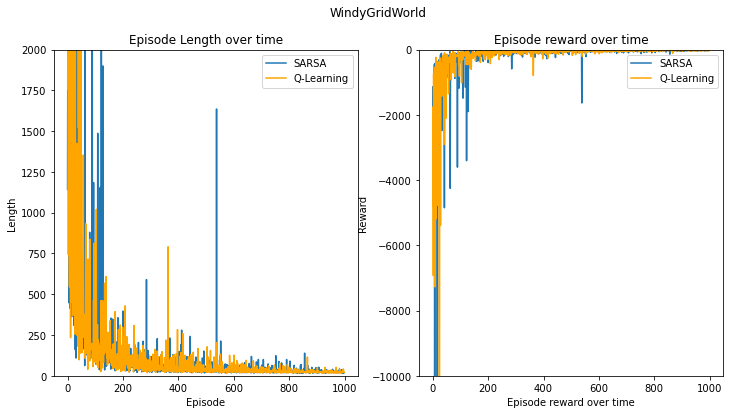

In [40]:
plot_rate(sarsa_info["length"], q_info["length"], sarsa_info["rewards"], q_info["rewards"], "WindyGridWorld")

In [41]:
run_times = 10

for i in range(run_times):
    
    # Run SARSA
    _, _, sarsa_info_tmp = sarsa(env, Q, num_actions, num_episodes, epsilon, lr)
    sarsa_info["length"] = [ sarsa_info["length"][i] + sarsa_info_tmp["length"][i] for i in range(num_episodes)]
    sarsa_info["rewards"] = [ sarsa_info["rewards"][i] + sarsa_info_tmp["rewards"][i] for i in range(num_episodes)]
    
    # Run Q-Learning 
    _, _, q_info_tmp = q_learning(env, Q, num_actions, num_episodes, epsilon, lr)
    q_info["length"] = [ q_info["length"][i] + q_info_tmp["length"][i] for i in range(num_episodes)]
    q_info["rewards"] = [ q_info["rewards"][i] + q_info_tmp["rewards"][i] for i in range(num_episodes)]

sarsa_info["length"] = [val/(run_times+1) for val in sarsa_info["length"]]
sarsa_info["rewards"] = [val/(run_times+1) for val in sarsa_info["rewards"]]
q_info["length"] = [val/(run_times+1) for val in q_info["length"]]
q_info["rewards"] = [val/(run_times+1) for val in q_info["rewards"]]

100%|██████████| 1000/1000 [00:57<00:00, 17.43it/s]


In [42]:
wgw_sarsa_info_length = smoothData(sarsa_info["length"], 50)
wgw_q_info_length = smoothData(q_info["length"], 50)
wgw_sarsa_info_rewards = smoothData(sarsa_info["rewards"], 50)
wgw_q_info_rewards = smoothData(q_info["rewards"], 50)

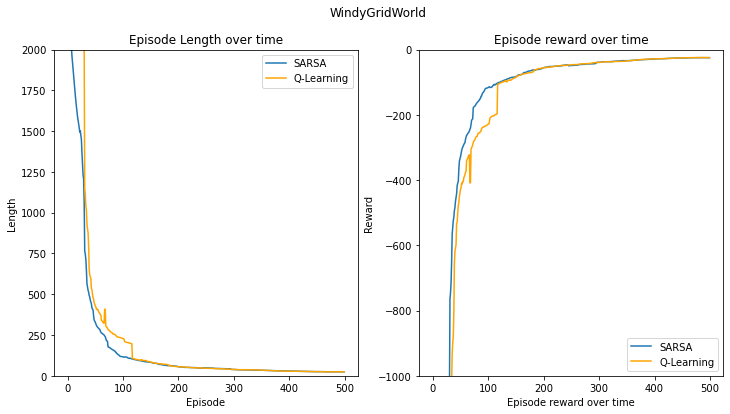

In [43]:
plot_rate(wgw_sarsa_info_length, wgw_q_info_length, wgw_sarsa_info_rewards, wgw_q_info_rewards, "WindyGridWorld", 3)

# Task 2: Analysis (Comparison of Q-learning and SARSA learning algorithms)

1. Comment on the number of episodes required to converge to the optimal policy for both environments. 
       
2. Discuss the differences in the reward graphs.  

3. Calculate the average return across the episodes for each environment. It gives a measure of the performance of the algorithm while learning (i.e., online performance).  

4. Calculate the return after convergence. It gives you a measure of the performance after the learning is completed (i.e., offline performance). 

5. Briefly summarize your results.
 
 It is advisable to rerun the algorithm a few times to get a clearer understanding of the algorithms.

## Statements

**Selection of $\alpha$:**
According to Robbins-Monro Conditions, to meet the requirement of convergence, $\alpha$ should satisfy: 


$$ \sum_{n=1}^{\infty} \alpha_n = \infty \tag{1}$$ 
$$ \sum_{n=1}^{\infty} \alpha_n^2 < \infty \tag{2}$$

To meet the condition, We set $\alpha = 0.8*(1/n)$, where 0.8 is the intial learning rate. The result of formula (1) is $\log n$, which is $\infty$ when $n$ is infinite. The result of formula (2) is $0.8*(\pi^2/6)$ when $n$ is $\infty$. So the setting satisfy both conditions. 

To explain this, the learning rate decreases with every step excutes, becasue later steps are less relevant with current steps, the weight decreases gradually.

**Selection of $\epsilon$:**
Epsilon is for the $\epsilon$-greedy policy, we set $\epsilon$ to be 0.25 at first, and with the learning of the model, the $\epsilon$ is becoming smaller and smaller, here we assume it decreases to 0.05. The explanation is, the more the model learns, the more knowledge it gets, thus it is better for the model to take optimal actions than take actions randomly. The decrease of the $\epsilon$ reduces the probability($\epsilon$) of picking direction randomly, which means the probability(1- $\epsilon$) increases. The reason we don't set $\epsilon$ to 0 is because we want to present the difference between SARSA and Q-learning. 

**Selection of $\gamma$:**
Though we do not think the reward of the future steps is the same as the current, it is an ignored condition in this problem, so we set $\gamma$ = 1 as the discount rate.

**Numbers of episodes:**
We mainly try the number of episodes in 200, 500, 1000 and 10000.Although the more episodes we train, the better the policy is, it takes quite a long time to train too many episodes. Roughly, 1000 is a suitable number for this problem as the result works out fine and it takes not very long time. 

## Comments

**Q0.
How do we choose the convergence point?**

Firstly, we notice that it is quite impossible to find a fixed convergence point in the original data (as shown in fig1 and fig3). The randomness of algorithm leads to rapid changes in the output data even after many episodes. Therefore, we use "average" function to process data and make the trend smoother, which is more suitable for determining convergence.
    
Secondly, the number for convergence differs if we use different number of episodes. And even while we are using the same number of episodes, the convergence point flucuates. We estimate convergence episode conservatively. To be more specific, we observe the value in the range of line which turns nearly horizontal, and the values are around -150 to -80. Therefore, we choose -90 as the target value and 20 as threshold, i.e., when the average value falls in the range of (-110, -70), the index is considered as convergence point.

**Q1.
Comment on the number of episodes required to converge to the optimal policy for both environments.**
      
The number required to converge varies significantly in each training. 

Generally, in windy grid world, the number required to converge to the optimal policy are more close to each other and are bigger than Q-learning result in grid world.

These phenomena can be explained by the influence of "windy" situation. To be specific, the length of the path from start state to the destination state in windy grid world is longer than that in grid world. Therefore, it takes longer time for both algorithms to find out the strategy. 

Also, the strategy of SARSA is stable and it cannot handle dynamic environment. As a result, the windy environment increases the chance for states in SARSA to trap in a bad situation, which adds to its risk and reduces the difference between these two algorithms. 
    
**Q2.
Discuss the differences in the reward graphs.**
    
As we can see,  the Q-learning line and SARSA line in grid world are clearly seperated, while these two lines entangled together in windy grid world. 

In grid world, the reward of Q-learning is generally smaller than SARSA, that is because SARSA selects the action following the same current policy and updates its Q-values, i.e., it avoids repeating the bad direction (direction with extreme low rewards) that has been explored. On the contrary, Q-learning chooses the $\epsilon$-greedy action, which means it has higher chance of exploring bad directions and therefore obtain lower rewards. Eventually, SARSA selects a more conservative and 

However, the windy grid world adds more uncertainty and reduces the advantage of SARSA. As a result, SARSA no longer shows apparent better result than Q-learning.

**Q3.
Calculate the average return across the episodes for each environment. It gives a measure of the performance of the algorithm while learning (i.e., online performance).** 

In grid world, comparing the average length of Q-learning and SARSA, we could see that the length of SARSA is less than Q-learning, which means SARSA takes less average steps to find the optimal path. From this perspective, we regard SARSA as a better solution than Q-learning in this problem.

In windy grid world, both algorithms result in long average length. Note that, the average length of SARSA is larger than Q-learning, which is similar to the case in grid world.

**Q4.
Calculate the return after convergence. It gives you a measure of the performance after the learning is completed (i.e., offline performance).**

We can observe that after convergence the average length of both algorithms are quite close in grid world, and the length of SARSA is slightly higher than Q-learning, which means the optimal path that Q-learning finds is shorter than SARSA. While taking a look at rewards, SARSA's average rewards are higher, which means the optimal path SARSA finds has higher expected rewards. Comparing both, the optimal path of Q-learning is more risky while SARSA is better on expected rewards.

In windy grid world, the average lengths after convergence of two algorithms are also very close. That is to say, their performance are similar in this scenario. What's more, both results are larger than those in grid world, indicating it takes longer path in windy grid world to reach goal state.

**Q5.
Briefly summarize your results.**
    
To summarize, Q-learning shows lower average rewards and higher length compared with SARSA in grid world enviroment. This is because Q-learning takes more risk to find a shortest, or theoritically best solution. Because it gets higher chance of getting into "dangerous place" (such as the cliff in this environment), the expected(average) rewards are smaller.

However, the difference between these two algorithms is not so evident in windy grid world, which contains more uncertainty and therefore reduces the advantage of SARSA. Also, it takes more efforts for both algorithms to reach goal state in windy grid world, which is reflected in their lengths and rewards.